In [47]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [58]:
#Initialise

startDate = datetime(2013, 1, 1)

endDate = datetime(2023, 12, 31)

ConsolidatedTable = []

In [59]:
def double_bollinger_bands(df, window=20):
    rolling_mean = df["Close"].rolling(window).mean()
    rolling_std = df["Close"].rolling(window).std()
    
    upper_band1 = rolling_mean + (rolling_std)
    lower_band1 = rolling_mean - (rolling_std)
    upper_band2 = rolling_mean + (rolling_std * 2)
    lower_band2 = rolling_mean - (rolling_std * 2)
    
    df['Upper_Band1'] = upper_band1
    df['Lower_Band1'] = lower_band1
    df['Upper_Band2'] = upper_band2
    df['Lower_Band2'] = lower_band2
    
    df['Buy_Signal'] = np.where((df["Close"] < df['Lower_Band1']) & (df["Close"] > df['Lower_Band2']), 1, 0)
    df['Sell_Signal'] = np.where((df["Close"] > df['Upper_Band1']) & (df["Close"] < df['Upper_Band2']), 1, 0)
    
    return df
    
def backtest(df, initial_capital):
        
    position = 0
    cash = initial_capital
    portfolio_value = []
    
    for date, row in df.iterrows(): #assume we can buy as many as can, and sell all, naive strategy
        if row['Buy_Signal'] and cash >= row["Close"]:
            shares_to_buy = cash // row["Close"]
            cash -= shares_to_buy * row["Close"]
            position += shares_to_buy
        
        elif row['Sell_Signal'] and position != 0:
            cash += position * row["Close"]
            position = 0

        total_value = cash + (position * row["Close"])
        portfolio_value.append(total_value)

    df["Portfolio_Value"] = portfolio_value
    
    return df
    
def compute_metrics(df,stock_to_use):
    returns = df['Close'].pct_change().dropna()
    total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]
    annual_return = ((1 + total_return) ** (1/10)) - 1
    annual_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility #no risk free return
    downside_returns = returns[returns < 0]
    sortino_ratio = annual_return / (np.std(downside_returns) * np.sqrt(252))
    max_drawdown = (df['Close'].cummax() - df['Close']).max() / df['Close'].cummax().max()
    
    print( {
    "Stock": stock_to_use,
    'Total Return': round(total_return,2),
    'Annual Return':round(annual_return,2),
    'Annual Volatility': round(annual_volatility,2),
    'Sharpe Ratio': round(sharpe_ratio,2),
    'Sortino Ratio': round(sortino_ratio,2),
    'Maximum Drawdown': round(max_drawdown,2)
} )

    ConsolidatedTable.append([stock_to_use,round(total_return,2),round(annual_return,2),round(annual_volatility,2),round(sharpe_ratio,2),round(sortino_ratio,2),round(max_drawdown,2)])


def backtesting_mag_7(stock_to_use,startDate,endDate):
    df = pd.DataFrame(yf.download(stock_to_use, start=startDate, end=endDate)['Adj Close'])
    df = df.rename(columns={"Adj Close":"Close"})

    df = double_bollinger_bands(df)

    initial_capital = 10000        
        
    df = backtest(df, initial_capital)
        
    compute_metrics(df,stock_to_use)

    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Portfolio_Value'], label="Portfolio Value")
    plt.title(f"Portfolio Value Over Time for {stock_to_use}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'MSFT', 'Total Return': 15.66, 'Annual Return': 0.32, 'Annual Volatility': 0.27, 'Sharpe Ratio': 1.21, 'Sortino Ratio': 1.65, 'Maximum Drawdown': 0.33}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


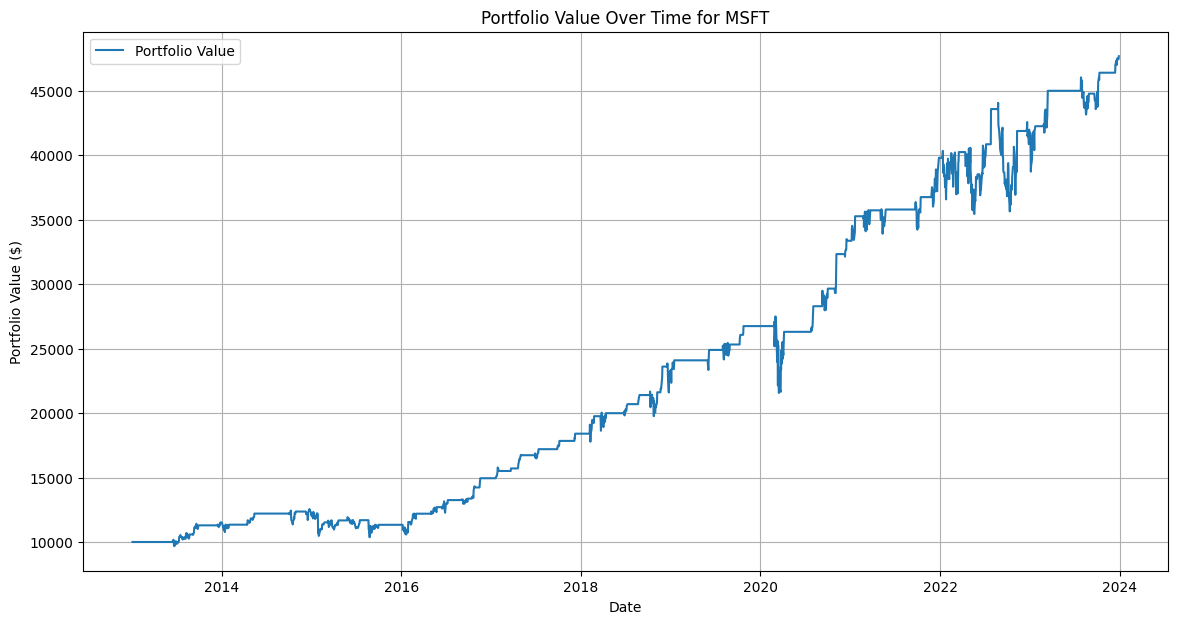

In [60]:
backtesting_mag_7("MSFT",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'AAPL', 'Total Return': 10.48, 'Annual Return': 0.28, 'Annual Volatility': 0.28, 'Sharpe Ratio': 0.97, 'Sortino Ratio': 1.32, 'Maximum Drawdown': 0.28}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


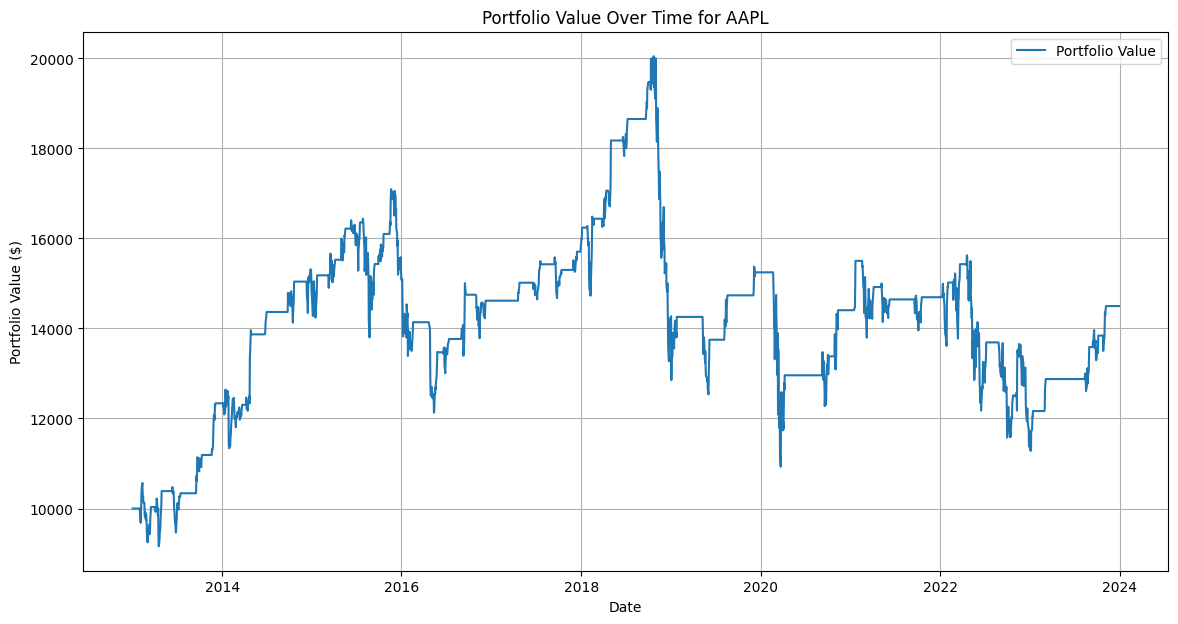

In [61]:
backtesting_mag_7("AAPL",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'NVDA', 'Total Return': 167.67, 'Annual Return': 0.67, 'Annual Volatility': 0.45, 'Sharpe Ratio': 1.5, 'Sortino Ratio': 2.19, 'Maximum Drawdown': 0.44}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


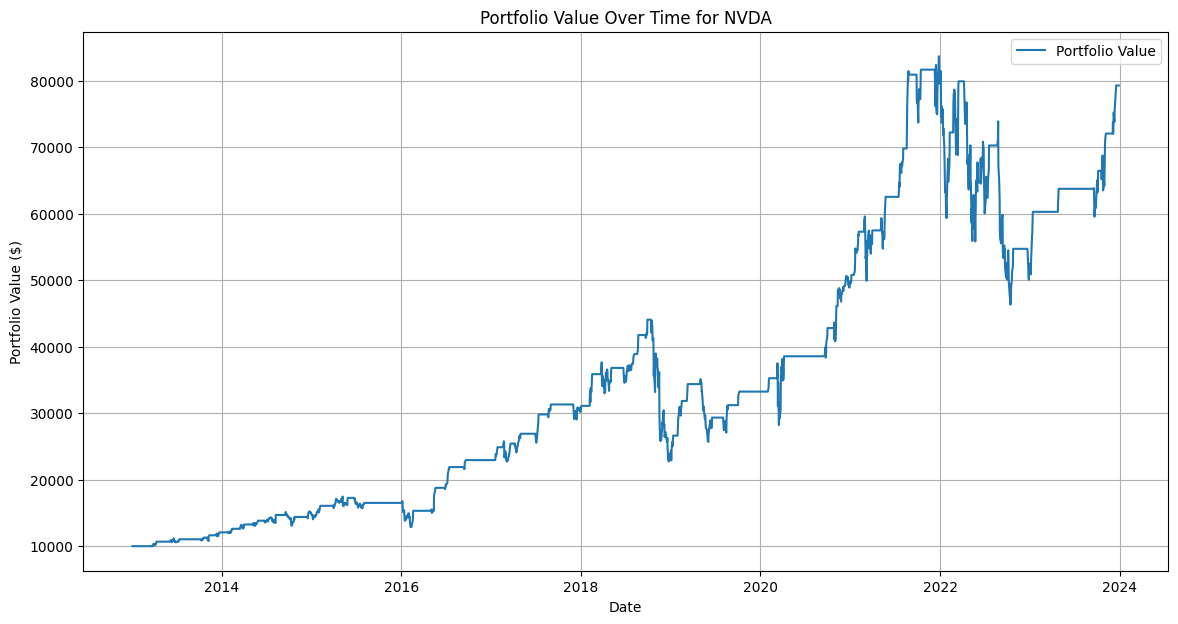

In [62]:
backtesting_mag_7("NVDA",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'AMZN', 'Total Return': 10.81, 'Annual Return': 0.28, 'Annual Volatility': 0.33, 'Sharpe Ratio': 0.86, 'Sortino Ratio': 1.21, 'Maximum Drawdown': 0.56}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


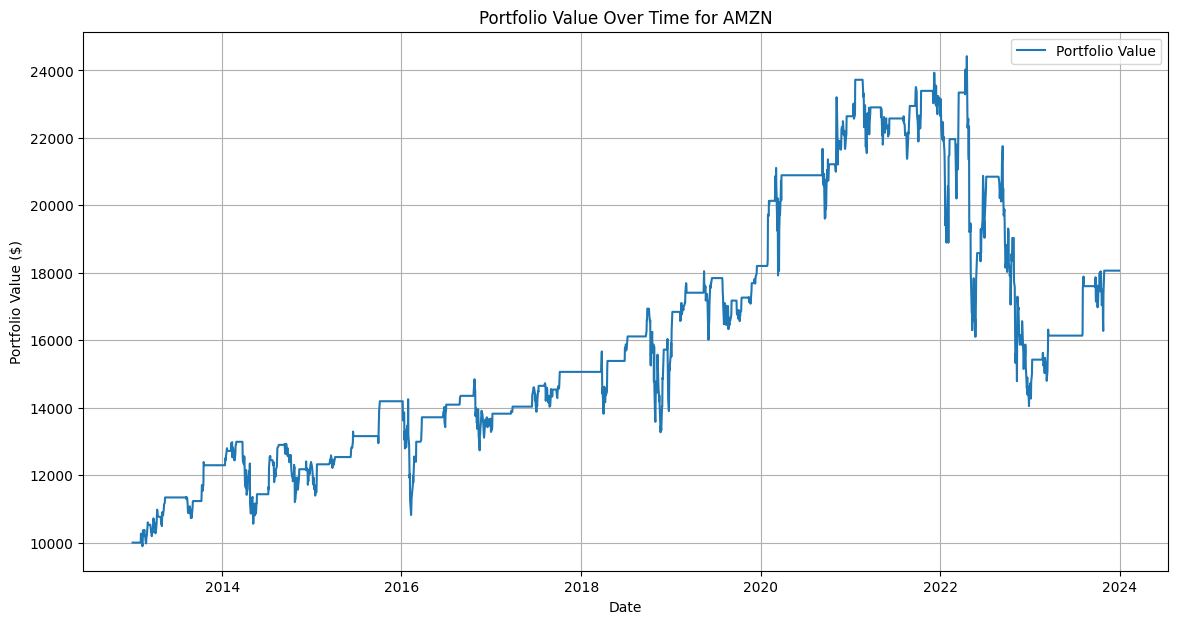

In [63]:
backtesting_mag_7("AMZN",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'GOOG', 'Total Return': 6.82, 'Annual Return': 0.23, 'Annual Volatility': 0.27, 'Sharpe Ratio': 0.83, 'Sortino Ratio': 1.17, 'Maximum Drawdown': 0.45}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


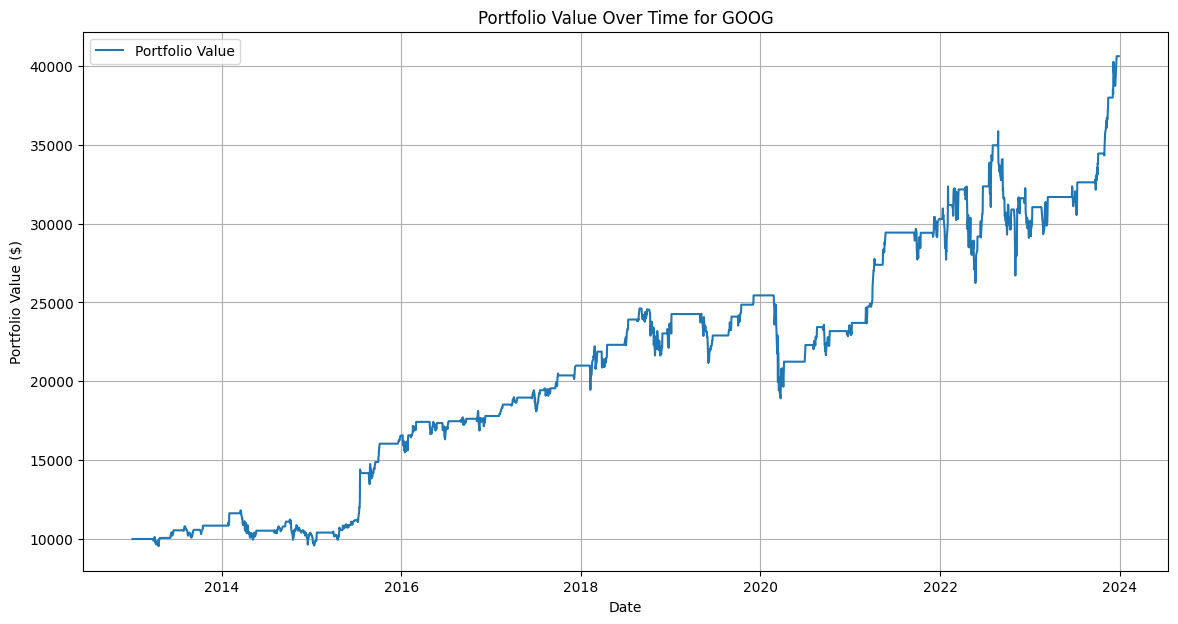

In [64]:
backtesting_mag_7("GOOG",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'META', 'Total Return': 11.64, 'Annual Return': 0.29, 'Annual Volatility': 0.38, 'Sharpe Ratio': 0.75, 'Sortino Ratio': 1.0, 'Maximum Drawdown': 0.77}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


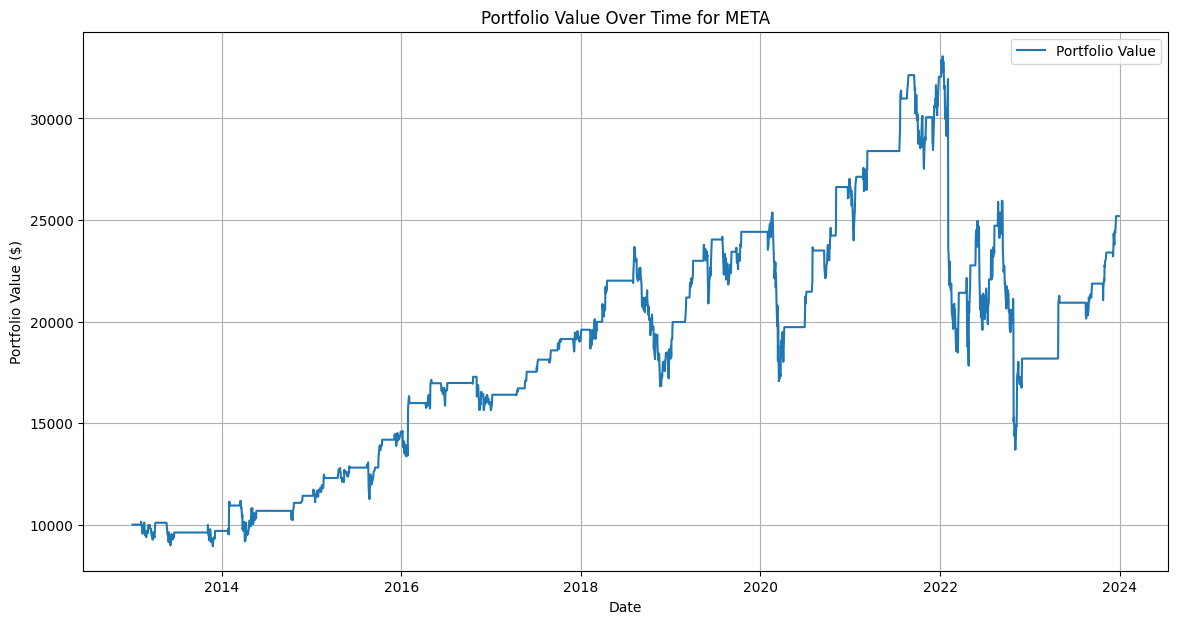

In [65]:
backtesting_mag_7("META",startDate,endDate)

[*********************100%%**********************]  1 of 1 completed

{'Stock': 'TSLA', 'Total Return': 104.41, 'Annual Return': 0.59, 'Annual Volatility': 0.57, 'Sharpe Ratio': 1.04, 'Sortino Ratio': 1.53, 'Maximum Drawdown': 0.74}



C:\Users\thepi\AppData\Local\Temp\ipykernel_34440\1911364420.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (df['Close'][-1] - df['Close'][0]) / df['Close'][0]


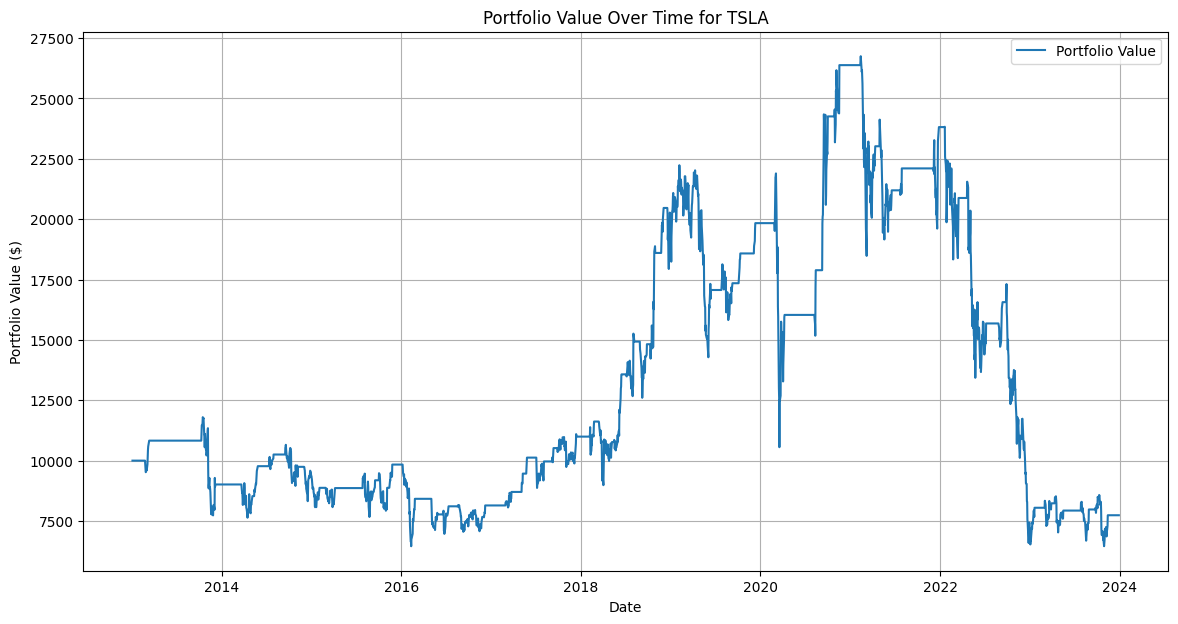

In [66]:
backtesting_mag_7("TSLA",startDate,endDate)

In [67]:
print(tabulate(ConsolidatedTable,['Total Return','Annual Return',"Annual Volatility","Sharpe Ratio","Sortino Ratio","Maximum Drawdown"],
tablefmt = "github")) 

|      |   Total Return |   Annual Return |   Annual Volatility |   Sharpe Ratio |   Sortino Ratio |   Maximum Drawdown |
|------|----------------|-----------------|---------------------|----------------|-----------------|--------------------|
| MSFT |          15.66 |            0.32 |                0.27 |           1.21 |            1.65 |               0.33 |
| AAPL |          10.48 |            0.28 |                0.28 |           0.97 |            1.32 |               0.28 |
| NVDA |         167.67 |            0.67 |                0.45 |           1.5  |            2.19 |               0.44 |
| AMZN |          10.81 |            0.28 |                0.33 |           0.86 |            1.21 |               0.56 |
| GOOG |           6.82 |            0.23 |                0.27 |           0.83 |            1.17 |               0.45 |
| META |          11.64 |            0.29 |                0.38 |           0.75 |            1    |               0.77 |
| TSLA |         104.41 